# What is Spark?

Apache Spark is a computation and processing library. It distributes data over a large number of nodes, and for performing paraellel computations over that cluster.


## Spark Computation

Spark operations concern Resilient Distributed Data (RDD) objects: representations of the data partitioned across multiple nodes, able to be operated on in parallel.

In Spark 1, programmers work with RDDs directly. In Spark 2, the DataFrame and SQL API is strongly preferred -- but RDDs are still available. Since quite a lot of legacy code still exists, and RDDs still have their use in Spark 2, we start with RDDs. However Databricks (the authors) strongly recommends DataFrames for new projects. (And "Datasets" in Scala which are strongly-typed DataFrames).  

The general approach with RDDs is:

1. Create an RDD representation of the data set, distributing data across the cluster
2. Perform a **transformation** on the RDD representation, producing a new distributed dataset
3. Perform an **action** to extract the final result from the cluster, in a non-distributed format 

Transformations are not computed until an action takes place. 


## Spark Languages

The native language for Spark is Scala. This is for good reason - most operations associated with Spark are transformations and actions on RDDs, and functional programming lends itself well to these types of operation.

A Spark program would consists of a sequence of mappings applied one after the other on an initial RDD.

However, Spark is not restricted to Scala, it also provides APIs to most of the popular Data Science languages such as Python and R.

In this example, we will use pyspark, the python's Spark API to perform data manipulations.


## Spark Clusters

Spark can be setup on any cluster, including Hadoop, in which case it would be integrated with Yet Another Resource Negotiator (YARN).

The main difference between a Spark RDD and a file on HDFS is that the Spark RDD lives in the memory of each of the nodes, while a file on HDFS lives on their respective hard drives. 

Hence, while Hadoop MapReduce always reads and writes to files, operations on Spark RDDs are performed *in memory*, making Spark - in theory - **several orders of magnitude faster**.

# RDDs

## Spark Context Handler

`Pyspark` is the official Apache Spark module for Python.

The central handler of a Spark session  using pyspark is the `SparkContext` object.

A `SparkContext` object is your handler for calling Spark functions.

In [1]:
from pyspark import SparkConf, SparkContext

ModuleNotFoundError: No module named 'pyspark'

Before using Spark, we have to configure it correctly. We set a master node, and give a name to our application.

After this, we create an instance of the `SparkContext` handler - this will be our main interface to Spark.

In [2]:
conf = SparkConf().setMaster("local").setAppName("SparkExample")
sc = SparkContext(conf = conf)

## Creating RDDs

There are many ways to create RDD objects:
1. From list or arrays defined within the program
2. By reading from normal files
3. Reading from Hadoop HDFS
4. From the output of Hive queries
5. From the output of normal databases queries

### Lists

Below, we create RDDs from lists and arrays directly, using the `SparkContext.parallelize()` method.

In [3]:
rdd_list = sc.parallelize([1,2,3,4])

When we look at what the object we have created looks like, we see that it is different to a core python collection.

In [4]:
rdd_list

ParallelCollectionRDD[0] at parallelize at PythonRDD.scala:195

However, we can easily extract the information we stored as RDD by using the `collect()` method

In [5]:
rdd_list.collect()

[1, 2, 3, 4]

### Files

In [7]:
import zipfile
import os

if not os.path.exists("responses.csv"):
    with zipfile.ZipFile("data/YoungPeopleSurvey.zip", "r") as f:
        f.extractall(".")

For standard files we can use the `textfile()` method to read data in from a specified filepath.

In [8]:
rdd_file = sc.textFile('responses.csv')

The method `take()` allows us to specify how many lines we wish to see from the RDD

In [9]:
rdd_file.take(2)[1]

'5,3,2,1,2,2,1,5,5,1,1,1,1,1,3,1,1,1,1,5,4,2,5,4,4,1,5,5,3,1,2,1,5,1,3,3,5,3,5,3,3,3,3,5,3,1,1,1,1,5,3,3,2,1,5,5,1,4,4,2,5,4,4,1,1,1,1,1,5,3,1,3,2,"never smoked","drink a lot",4,2,2,5,4,2,5,4,4,1,3,5,1,1,3,4,1,3,1,3,1,4,5,4,3,2,1,1,1,4,2,3,"i am always on time","never",3,4,3,4,3,4,3,5,1,1,3,5,5,1,4,5,1,4,3,2,3,4,3,"few hours a day",3,4,5,3,3,1,3,20,163,48,1,"female","right handed","college/bachelor degree","no","village","block of flats"'

For HDFS files we can use the same function, but a different protocol

In [10]:
# rdd_hdfs = sc.textFile('hdfs:///path_to_file')

## Actions

RDD objects are *lazy* data structures, in that they only contain the logic to obtain results. They will generally only output results *until* an action method is called.

Suppose we have an RDD. All the methods below are action methods, in that they all produce output in a non-distributed format.

In [11]:
import numpy as np

rdd = sc.parallelize([ int(r) for r in np.random.normal(10, 2, 20)])

In [12]:
# obtain everything in RDD
rdd.collect()

[9, 7, 9, 10, 13, 13, 6, 5, 10, 8, 8, 8, 11, 9, 10, 8, 11, 8, 9, 8]

In [13]:
# take only the first 5 samples from the RDD
rdd.take(5)

[9, 7, 9, 10, 13]

In [14]:
# take the last 5 samples from the RDD
rdd.top(5)

[13, 13, 11, 11, 10]

In [15]:
# get the number of items in the RDD
rdd.count()

20

In [16]:
# get the histogram (count) of unique values in the RDD
hist = rdd.countByValue()
hist

defaultdict(int, {9: 4, 7: 1, 10: 3, 13: 2, 6: 1, 5: 1, 8: 6, 11: 2})

In [17]:
import seaborn as sns

sns.barplot(list(hist.keys()), list(hist.values()))

### Reduction

The below methods all perform reductive operations upon the RDD structure, in that the output of each is a single, unitary object

In [18]:
# apply sum to RDD
rdd.sum()

180

In [19]:
# min, max
rdd.min()

5

In [20]:
rdd.max()

13

In [21]:
# mean
rdd.mean()

8.999999999999998

In [22]:
rdd.reduce(lambda t, e : t + 2 * e)

351

In [23]:
rdd.fold(1, int.__mul__)

7385864389263360000

In [24]:
dir(rdd)

['__add__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getnewargs__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_computeFractionForSampleSize',
 '_defaultReducePartitions',
 '_id',
 '_is_barrier',
 '_jrdd',
 '_jrdd_deserializer',
 '_memory_limit',
 '_pickled',
 '_reserialize',
 '_to_java_object_rdd',
 'aggregate',
 'aggregateByKey',
 'barrier',
 'cache',
 'cartesian',
 'checkpoint',
 'coalesce',
 'cogroup',
 'collect',
 'collectAsMap',
 'combineByKey',
 'context',
 'count',
 'countApprox',
 'countApproxDistinct',
 'countByKey',
 'countByValue',
 'ctx',
 'distinct',
 'filter',
 'first',
 'flatMap',
 'flatMapValues',
 'fold',
 'foldByKey',
 'foreach',
 'foreachPartition',
 'fullOuterJoin',
 'getCheckpo

## Transformations

Transformations on the RDD are given as functions to .map

In [25]:
rdd.collect()[:5]

[9, 7, 9, 10, 13]

In [26]:
# element-wise mapping (multiply by 2)
result = rdd.map(lambda x: 2 * x)
result.collect()[:5]

[18, 14, 18, 20, 26]

In [27]:
# element-wise mapping to multiple values(a flattened result)
result = rdd.flatMap(lambda x: (x-0.1, x+0.1))
result.collect()[:5]

[8.9, 9.1, 6.9, 7.1, 8.9]

In [28]:
# filtering
# use a def, or use lambda
def is_even(x): 
    return x % 2 == 0

result = rdd.filter(is_even)
result.collect()

[10, 6, 10, 8, 8, 8, 10, 8, 8, 8]

In [29]:
# distinct values
result = rdd.distinct()
result.collect()

[9, 7, 10, 13, 6, 5, 8, 11]

In [30]:
# take random samples
# sample half of the rdd, with values not replaced
result = rdd.sample(False, 0.5)
result.collect()

[13, 6, 5, 8, 8, 11, 9, 8, 8, 9]

## Example

In the below example, we demonstrate a number of Spark functions by loading in a dataset and extracting information from it.

In [31]:
rdd = sc.textFile('responses.csv')

def parse(line):
    return line.strip().split(",")
    
header = parse(rdd.take(1)[0])
header[40:45]

['"Internet"', '"PC"', '"Economy Management"', '"Biology"', '"Chemistry"']

After reading in the file, we look to isolate the third column. To do this, we write a lambda function which discretises the input and isolates the third column. We then apply this to the RDD by using the `map()` function.

In [32]:
# use map to obtain the third column
rdd = rdd.map(lambda row: parse(row)[40])
rdd.take(10)

['"Internet"', '3', '1', '1', '3', '3', '4', '5', '2', '1']

We wish to understand the distribution of values within the dataset, and so we use the function `countByValue()` to bucket and count each value.

In [33]:
hist = rdd.countByValue()
del hist['"Internet"'], hist['']

We use the `pprint` (prettyprint) module to display the output.

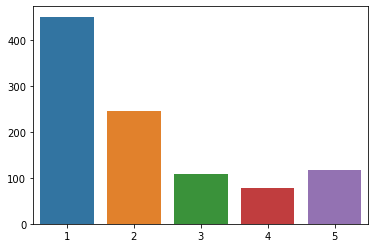

In [34]:
sns.barplot(list(hist.keys()), list(hist.values()))

## Key-Value RDDs

Key-value RDDs contain pairs of values for each item in the collection, again, distributed across multiple nodes.

The first element of each tuple is called the "key", and the second the "value".

**Note**: These should not be confused with a Python dictionary. Key-value RDDs are permitted repeat/duplicate keys, whereas Python dictionaries are not.

Below, we instantiate a key-value RDD.

In [35]:
kv = sc.parallelize(
    [
        ('Alice', 5),
        ('Bob', 2),
        ('Charlie', 3),
        ('Alice', 2),
        ('Charlie', 1)
    ]
)
kv.collect()

[('Alice', 5), ('Bob', 2), ('Charlie', 3), ('Alice', 2), ('Charlie', 1)]

### Special Actions

There are a number of actions we can perform which are specific to key-value RDD structures. We demonstrate a number of these below.

If we wish to consolidate those keys which are not unique, and combine the values, then we can use the `reduceByKey()`

In [36]:
# reduce the values on the same keys 
# --- same as group-by-aggregate
results = kv.reduceByKey(int.__add__)
results.collect()

[('Alice', 7), ('Bob', 2), ('Charlie', 4)]

If we want to sort the k-v RDD by key, we can use `sortByKey()`. If we wish to sort by value, we can use `sortBy()` and specify a lambda function.

In [37]:
# sort by key
results = kv.sortByKey()
results.collect()

[('Alice', 5), ('Alice', 2), ('Bob', 2), ('Charlie', 3), ('Charlie', 1)]

In [38]:
# if you want to sort by value
results = kv.sortBy(lambda x: x[1])
results.collect()

[('Charlie', 1), ('Bob', 2), ('Alice', 2), ('Charlie', 3), ('Alice', 5)]

If we want to create a collection of keys, we use `keys()`, if we want the values, we use `values()`.

In [39]:
# give RDD of keys
keys = kv.keys()
keys.collect()

['Alice', 'Bob', 'Charlie', 'Alice', 'Charlie']

In [40]:
# give RDD of values
values = kv.values()
values.collect()

[5, 2, 3, 2, 1]

### Transforming Values

Below, we demonstrate the `mapValues()`/`flatMapValues()` , which works in the same way as map on all values of the k-v RDD.

In [41]:
kv.mapValues(lambda x : x * 2).collect()

[('Alice', 10), ('Bob', 4), ('Charlie', 6), ('Alice', 4), ('Charlie', 2)]

In [42]:
kv.mapValues(lambda x : (x, x*2)).collect()

[('Alice', (5, 10)),
 ('Bob', (2, 4)),
 ('Charlie', (3, 6)),
 ('Alice', (2, 4)),
 ('Charlie', (1, 2))]

In [43]:
kv.flatMapValues(lambda x : (x, x*2)).collect()

[('Alice', 5),
 ('Alice', 10),
 ('Bob', 2),
 ('Bob', 4),
 ('Charlie', 3),
 ('Charlie', 6),
 ('Alice', 2),
 ('Alice', 4),
 ('Charlie', 1),
 ('Charlie', 2)]

# Spark SQL DataFrame

Spark allows one to create DataFrames similar to once provided by Pandas, and allows SQL to be performed on them.  And of course everything, the DataFrame, and the SQL operations are stored and performed on the distributed cluster.

## SQLContext

To use Spark SQL features, we need a dedicated SQL context handler. This serves as the point of call for all SQL related operations, and can be instantiated using the Spark context we already have.

An `SQLContext` can also be created directly from a SparkSession -- which is the preffered method for the newer versions.

## 1. Creating a DataFrame from an existing RDD

The DataFrame is created by changing the RDD into a collection of Row objects. Row objects represent a row in a table.


In [44]:
from pyspark.sql import Row
# reads into a RDD of a collection of lines then parses to lists
lines = sc.textFile('responses.csv').map(parse).map(lambda row: row[0: 10])

# choose simple col name (originals have quotes, etc.)
columns = [ (h[1:4] + h[-2:-1]) for h in lines.take(1)[0]]

columns[:5], len(columns)

(['Musc', 'Slos', 'Dane', 'Folk', 'Couy'], 10)

In [45]:
lines = lines.filter(lambda row: len(row[0]) < 2)

In [46]:
# convert to a RDD of collection of Rows
rows = lines.map(lambda row: Row(**dict(zip(columns, row))))

rows.take(4)

[Row(Clac='2', Couy='2', Dane='2', Folk='1', Metk='1', Musc='5', Musl='1', Popp='5', Rock='5', Slos='3'),
 Row(Clac='1', Couy='1', Dane='2', Folk='1', Metk='4', Musc='4', Musl='2', Popp='3', Rock='5', Slos='4'),
 Row(Clac='4', Couy='3', Dane='2', Folk='2', Metk='3', Musc='5', Musl='5', Popp='3', Rock='5', Slos='5'),
 Row(Clac='1', Couy='1', Dane='2', Folk='1', Metk='1', Musc='5', Musl='1', Popp='2', Rock='2', Slos='3')]

Once we have this structure stored distributively, it is easy to extract the dataframe to standard python format by using `createDataFrame()`

In [47]:
from pyspark.sql import SQLContext

# we can than make the dataframe from the rows
df = SQLContext(sc).createDataFrame(rows)

# visually display the dataframe
df.show(5)

+----+----+----+----+----+----+----+----+----+----+
|Clac|Couy|Dane|Folk|Metk|Musc|Musl|Popp|Rock|Slos|
+----+----+----+----+----+----+----+----+----+----+
|   2|   2|   2|   1|   1|   5|   1|   5|   5|   3|
|   1|   1|   2|   1|   4|   4|   2|   3|   5|   4|
|   4|   3|   2|   2|   3|   5|   5|   3|   5|   5|
|   1|   1|   2|   1|   1|   5|   1|   2|   2|   3|
|   4|   2|   4|   3|   1|   5|   3|   5|   3|   3|
+----+----+----+----+----+----+----+----+----+----+
only showing top 5 rows



## 2. Creating a DataFrame from a SparkSession

Aside: each line in python is a complete statement except when:
1. denoting a block of code
2. finished by a `\`
3. within brackets

Spark uses long chains of method calls which, for clarity, are conventionally placed on their own lines. 

Many spark examples convert from scala then by simply appending a `\` to each line. 

My preference is to use parentheses to group the lines together: a more pythonic style; and easier to keep track of, requiring only a pair of easily formatted characters, rather than many hard-to-see line endings.

In [48]:
from pyspark.sql import SparkSession

spark = (
    SparkSession.builder
        .master("local")
        .appName("Survey Responses")
        .getOrCreate()
)

## .read

Spark SQL provdies `spark.read` which will parse and distribute your data if its in one of its supported formats (eg., csv, json, parquet, etc.). 

If your file contains its own schema (eg., a csv with a header row), spark can use it to structure your data appropriately. If it does not you can manually define one, as below. 

In [50]:
from pyspark.sql.types import StructField, StructType, StringType, ShortType, LongType

schema_item = StructType([
  StructField("UserID", LongType()),
  StructField("Title", StringType()),
])

dfi = (
  spark
  .read
  .schema(schema_item)
  .option("header", "false")
  .option("delimiter", "|")
  .csv("data/ml-100k/u.item")
)

dfi.show(3)

+------+-----------------+
|UserID|            Title|
+------+-----------------+
|     1| Toy Story (1995)|
|     2| GoldenEye (1995)|
|     3|Four Rooms (1995)|
+------+-----------------+
only showing top 3 rows



## Querying Spark DataFrame

In [52]:
df = (
  spark
  .read
  .option("inferSchema", "true")
  .option("header", "true")
  .csv("responses.csv")
)


In [53]:
df.select("Music", "Internet").show(5)

+-----+--------+
|Music|Internet|
+-----+--------+
|    5|       5|
|    4|       4|
|    5|       4|
|    5|       3|
|    5|       2|
+-----+--------+
only showing top 5 rows



In [54]:
df.columns[40:50]

['Chemistry',
 'Reading',
 'Geography',
 'Foreign languages',
 'Medicine',
 'Law',
 'Cars',
 'Art exhibitions',
 'Religion',
 'Countryside, outdoors']

In [55]:
# select

df.select("Music", "Internet").show(5)

+-----+--------+
|Music|Internet|
+-----+--------+
|    5|       5|
|    4|       4|
|    5|       4|
|    5|       3|
|    5|       2|
+-----+--------+
only showing top 5 rows



In [56]:
# where (filter)

(df
    .select("Music", "Internet")
    .filter(df["Music"] > 2)
    .show(5)
)

+-----+--------+
|Music|Internet|
+-----+--------+
|    5|       5|
|    4|       4|
|    5|       4|
|    5|       3|
|    5|       2|
+-----+--------+
only showing top 5 rows



In [57]:
# orderBy

(df
    .select("Music", "Internet")
    .filter(df["Music"] > 2)
    .orderBy("Internet", ascending=False)
    .show(5)
)

+-----+--------+
|Music|Internet|
+-----+--------+
|    5|       5|
|    5|       5|
|    5|       5|
|    5|       5|
|    5|       5|
+-----+--------+
only showing top 5 rows



In [60]:
# groupBy aggregate
(df
    .select("Music", "Internet", "Physics", "Religion")
    .filter(df["Music"] > 2)
    .groupBy(df["Religion"])
    .mean()
    .orderBy(df["Religion"])
    .show()
)

+--------+-----------------+------------------+------------------+-------------+
|Religion|       avg(Music)|     avg(Internet)|      avg(Physics)|avg(Religion)|
+--------+-----------------+------------------+------------------+-------------+
|    null|4.666666666666667| 4.666666666666667|3.6666666666666665|         null|
|       1|4.809644670050761| 4.224489795918367|1.9464285714285714|          1.0|
|       2|4.815533980582524|  4.12621359223301|1.8980582524271845|          2.0|
|       3|4.761658031088083| 4.196891191709844| 2.139896373056995|          3.0|
|       4|4.766990291262136| 4.207920792079208|2.3883495145631066|          4.0|
|       5|4.806818181818182|4.1477272727272725| 2.352272727272727|          5.0|
+--------+-----------------+------------------+------------------+-------------+



In [61]:
# multiple aggregates
import pyspark.sql.functions as func

results = ( 
    df
    .select("Physics", "Religion")
    .filter(df["Music"] > 2)
    .groupBy(df["Religion"])
    .agg(
        func.mean('physics').alias('Epx'),
        func.stddev('physics').alias('Spx'),
        func.count(func.lit(1)).alias('Nr')
    )
    .orderBy(df["Religion"])
)

In [62]:
results.show()

+--------+------------------+------------------+---+
|Religion|               Epx|               Spx| Nr|
+--------+------------------+------------------+---+
|    null|3.6666666666666665|1.1547005383792517|  3|
|       1|1.9464285714285714|1.2051413729933331|394|
|       2|1.8980582524271845|1.1280443325075025|206|
|       3| 2.139896373056995|  1.27725046064017|193|
|       4|2.3883495145631066|1.2226057812106739|103|
|       5| 2.352272727272727|1.3394094832594512| 88|
+--------+------------------+------------------+---+



In [63]:
data = {r.Religion: r.Nr for r in results.collect()}
data

{None: 3, 1: 394, 2: 206, 3: 193, 4: 103, 5: 88}

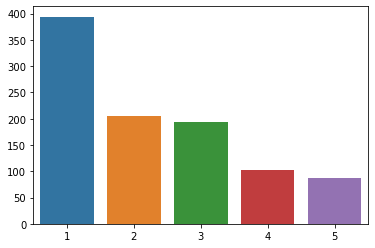

In [64]:
sns.barplot(list(data.keys()), list(data.values()))

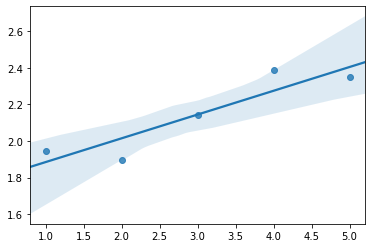

In [85]:
data = {r.Religion: r.Epx for r in results.collect() if r.Religion}

sns.regplot(list(data.keys()), list(data.values()));

## Stopping

Last, but not least, we stop the SparkContext object, much in the same way we would close a connection to a file.

In [66]:
#sc.stop()